# Musternotebook: Klassifizierung

Das Ziel dieses Notebooks ist es eine Musterlösung für die Aufbereitung eines Klassifikationsproblems bereitzustellen.
Hierzu werden zuerst die Schritte erläutert und diese dann auf ein Beispiel Datenset angewendet.

**Disclaimer:**
In diesem Notebook werden einige Werte und Verfahren mit mehreren Worten, die sich in der Bedeutung kaum,
bis gar nicht unterscheiden, aber in ihrem Context Variieren beschrieben. Weiteres werden Verfahren teils in ihrer 
englischen wie auch in ihrer deutschen Beschreibung benamst. Dies beruht darauf, dass das Notebook
auf Verständnis und nicht perfekte Genauigkeit in der Wortwahl ausgelegt ist. Ich bitte um ihr Verständnis. <br/>
Beispiele:
 - Dataset / DataFrame / Datensatz
 - Spalte (eines Datasets) / Feature / Dimension


## Struktur
### Imports, Variables & Settings
 - Random Seed
 - Seaborn/Matplot Color schema
 - Sonstige Configs (np, pandas, etc)
 - Helper Functions / imports für utilities

### Daten Laden / Migrieren
Daten von verschiedenen Datenquellen laden / importieren und migrieren (zusammenführen)

### Vorverarbeitung
#### Data Cleaning / Daten Bereinigung
 - Datentypen konvertieren
 - Auffällige Werte löschen
 - Null Values entfernen / ausfüllen / interpolieren etc.
 - Explorative Dataanalysis (EDA) Kennzeichen, Verteilungen, Wertebereiche anschauen (auch Grafisch)


#### Feature Reduction / Dimension-reduktion
 - Bestimmen des / der Labels und Teilen in Input (x) und Output (y) Dataset. <br/>
    **Notiz:** Alle folgende Schritte die auf die Selection von Features aus sind,
    werden nur auf das Input Dataset angewendet.
 - 'Feature selection' in Form manuellem aussortieren von unnützen Spalten (tB. zu viele NaN Werte, nichts aussagend)
 - Correlations-Matrix und Variance Inflation Factor (VIF) Analyse <br/>
   **Notiz:** Alle Features mit einem VIF Wert von über 10 haben eine hohe Multikollinearität und sollten entfernt werden.
 - Weitere Feature selection Verfahren.

 **Wichtig:** Aufschreiben der reduzierten features, nachdem diese bei neuen Echtdaten auch entfernt werden müssen.


### Train / Validation / Test Datasets
  #### Test - Dataset
  Das Test Dataset ist ein set das dazu verwendet wird das finale Model zu validieren und mit anderen Modelen vergleichbar zu machen.
  In einem Kaggle Wettbewerb zB. wird das Testset bis nach Ende geheim gehalten und dient zum Vergleich der Modelle und zur Erstellung der Rangliste.

  #### Train / Validation Split
  Train- und Validationset dienen zur Modellierung, Testen und Hyperparameter tuning.
  Deren Verhältnis (Ratio) liegt je nach dataset und model größe zwischen 70/30 und 80/20.


### Transformierung / Dimension-reduktion
   - Ausreißer analyse nach Train/Test-Split (Nicht immer möglich / gewünscht)
      wegen
       - Verzerrung der Standardisierung / Normalisierung
       - Test der Robustheit des Models gegen Ausreißer
   - Standardisierung / Normalisierung
   - LDA / PCA
   - VIF Dimension-reduktion


### Modelle für Klassifikationsprobleme:

#### Logistische Regression
 - VIF notwendig
 - Nummerischer Input
 - Kategoriale unabhängige Variable
 - Standardisierung: Empfohlen

#### kNN
 - Standardisierung: ja
 - LDA/PCA: ja - bei vielen Dimensionen notwendig
 - Kategoriale unabhängige Variable möglich
 - Abhängige Variablen encodieren: ja
 - möglichst wenige Dimensionen

#### Decision Tree
 - Nullable
 - Standardisierung: nein, Interpretierbarkeit geht dadurch verloren
 - LDA/PCA: ja wenn die Beschreibbarkeit nicht wichtig ist
 - Kategoriale unabhängige Variable möglich (scikit-learn encoding)
 - Abhängige Variablen encodieren: nein (scikit-learn encoding)

#### SVC
 - Standardisierung: ja
 - bei nicht linearen Trennungen richtigen Kernel wählen (rbf, ..)
 - Kategoriale UV möglich (scikit-learn encoding)
 - AV encodieren: ja
 - Parameter C - Breite der Trennung (wie viel Ungenauigkeit wird zugelassen)


### Kombinierte Klassifikatoren:

  #### Bagging (= B ootstrap Agg regation) / Pasting
  Kern Verfahren des Random Forest es selektiert jeweils nur ein Subset (teil der Sätze) und trainiert damit Decision Trees. Dieses Verfahren kann mit (Bagging) und ohne Zurücklegen (Pasting) erfolgen. Danach wird über einen Mehrheitsbeschluss da Ergebnis geschlossen.

  **Out-Of-Bag Score:**
  Der OoB Score kann beim Bagging berechnet werden hierbei werden alle nach der beim Subset auswahl über bleibenden Datensätze verwendet um einen Accuracy Score zu berechnen. Sie werden somit als Extra (Validation Set verwendet)

  #### Random Forest
   - Bagging ist das Kernverfahren des Random Forest als Model wird hierbei Decision Tree verwendet.
   - Deshalb: Selbe Eigenschaften wie Decision Tree

  #### Voting Classifier
  Beim Voting Classifier werden mehrere Modele verwendet um die Klassification zu berechnen dabei wird ein Mehrheitsentschluss der Ergebnisse aller Modele verwendet.

### Regression:
Für so ziemlich allen oben genannten Klassifikatoren gibt es eine Regressions-Variante hier sind ein paar davon:

#### Linear Regression
 - VIF notwendig (Feature selection)
 - Nummerischer Input
 - Unabhängige Variable möglich
 - Standardisierung: nein, da sonst die Interpretierbarkeit verloren geht (bei binär) | mehrere Klassen evtl.

#### Decision Tree regression
Selbe Eigenschaften wie der Decision Tree Classifier jedoch werden nummerische / ordinal skalierte Daten vorhergesagt.

#### SVR - Support Vector Regression
Selbe Eigenschaften wie der Support Vector Classifier jedoch werden nummerische Daten vorhergesagt.


### Hyperparameter Tuning
   #### Grid Search (Scikit-learn GridSearchCV)
   Grid Search probiert alle ihm übergebenen Parameter eines Modells aus und returniert diejenigen die das beste Ergebnis liefern. Um das Ergebnis zu erhalten, muss `gs.best_params_` aufgerufen werden.

   #### Randomized Parameter Optimization (Scikit-learn RandomizedSearchCV)
   Randomized Parameter Optimization

   **Notiz:** Grid und Randomized Search verwenden intern eine Cross validation, um die Ergebnisse zu verbessern, die Anzahl


## Unsupervised

### Modelle
#### K-Means Clustering
 - Eigenschaften:
    - Distanzbasiert
    - Künstliche Labels
    - Stark abhängig von Startposition
 - k - Anzahl der Cluster
 - Wird verwendet um: Zusammengehörigkeit erklären
 - Ellbogen-Methode: mehrere k ausprobieren und nach k / Durchschnittliche Cluster Streuung Plotten und nach dem "Knick" der Ellboge suchen.


## Imports, Variables & Settings

In [1]:
# Reset IPython Notebook Variables
%reset -f

In [2]:
# Imports
import numpy as np          # Numpy as the math lib
import pandas as pd         # Pandas for manipulating dataframes
import bdsm                 # bsdm as general helpers
import seaborn as sns       # seaborn for datavisualisation
import sklearn as sk        # scikit-learn for modeling and utility

from scipy.stats import zscore

from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Set seed
seed = 1234
np.random.seed(seed)

# Set seaborn color schema
palette = sns.dark_palette("#69d", reverse=False, as_cmap=True)

## Data Loading

In [3]:
# Loading from file
df_data = pd.read_csv("bdsm/datasets/data/penguins.csv", sep=",")
df_data

,StudyName,SampleNumber,Species,Region,Island,Stage,IndividualID,ClutchCompletion,DateEgg,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Sex,Delta15N,Delta13C,Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181,3750,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186,3800,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195,3250,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193,3450,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,PAL0910,64,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N98A2,Yes,2009-11-19,55.8,19.8,207,4000,MALE,9.70465,-24.53494,NaN
342,PAL0910,65,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A1,No,2009-11-21,43.5,18.1,202,3400,FEMALE,9.37608,-24.40753,Nest never observed with full clutch.
343,PAL0910,66,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A2,No,2009-11-21,49.6,18.2,193,3775,MALE,9.46180,-24.70615,Nest never observed with full clutch.
344,PAL0910,67,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N100A1,Yes,2009-11-21,50.8,19.0,210,4100,MALE,9.98044,-24.68741,NaN


In [4]:
# From special library
df_data = bdsm.datasets.penguins()
df_data

,StudyName,SampleNumber,Species,Region,Island,Stage,IndividualID,ClutchCompletion,DateEgg,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Sex,Delta15N,Delta13C,Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181,3750,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186,3800,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195,3250,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193,3450,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,PAL0910,64,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N98A2,Yes,2009-11-19,55.8,19.8,207,4000,MALE,9.70465,-24.53494,NaN
342,PAL0910,65,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A1,No,2009-11-21,43.5,18.1,202,3400,FEMALE,9.37608,-24.40753,Nest never observed with full clutch.
343,PAL0910,66,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A2,No,2009-11-21,49.6,18.2,193,3775,MALE,9.46180,-24.70615,Nest never observed with full clutch.
344,PAL0910,67,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N100A1,Yes,2009-11-21,50.8,19.0,210,4100,MALE,9.98044,-24.68741,NaN


### Vorverarbeitung / EDA

In [5]:
# Get dataset meta data
help(bdsm.datasets.penguins)

Help on function penguins in module bdsm.datasets.penguins:

penguins()
    Penguins data
    
    Predicting the species of penguines from physical measurements. Includes nesting
    observations from Palmer Station Antarctica LTER and K. Gorman., penguin size data,
    and isotope measurements from blood samples for adult Adélie, Chinstrap, and Gentoo penguins.
    
    Description
    -----------
    346 rows, 17 columns
    
    Given is the attribute name, attribute type, the measurement unit and a
    brief description. 
    The species is the value to predict (as a classification problem).
    (Descriptions are from the original dataset)
    
        Name                    Data Type       Meas.   Description
        ----                    ---------       -----   -----------
        studyName               string                  Sampling expedition from which data were collected, generated, etc.
        Sample Number           integer                 continuous numbering seque

In [6]:
# Get Data quality
df_data.info()

<class 'bdsm.datasets.penguins.PenguinsDataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   StudyName         346 non-null    object
 1   SampleNumber      346 non-null    object
 2   Species           346 non-null    object
 3   Region            346 non-null    object
 4   Island            346 non-null    object
 5   Stage             346 non-null    object
 6   IndividualID      346 non-null    object
 7   ClutchCompletion  346 non-null    object
 8   DateEgg           346 non-null    object
 9   CulmenLength      344 non-null    object
 10  CulmenDepth       344 non-null    object
 11  FlipperLength     344 non-null    object
 12  BodyMass          344 non-null    object
 13  Sex               336 non-null    object
 14  Delta15N          332 non-null    object
 15  Delta13C          333 non-null    object
 16  Comments          56 non-null     object
dtypes: 

In [7]:
bdsm.quality(df_data)

Dataframe has 346 rows and 17 columns.

8 columns have missing values.


,type,unique,missing_abs,missing_rel
StudyName,object,4,0,0.00
SampleNumber,object,153,0,0.00
Species,object,4,0,0.00
Region,object,2,0,0.00
Island,object,4,0,0.00
Stage,object,2,0,0.00
IndividualID,object,191,0,0.00
ClutchCompletion,object,3,0,0.00
DateEgg,object,51,0,0.00
CulmenLength,object,165,2,0.58


In [8]:
# Remove unnecessary features
columns_to_drop = [         # Reasons:
    'StudyName',            # Unrelated: Sample data unrelated to the whole dataset
    'SampleNumber',         # Unique identifier: Unique identifier in sample
    'Region',               # To sparse: only 1 unique value and 1 duplicated head
    'Stage',                # To sparse: only 1 unique value and 1 duplicated head
    'IndividualID',         # Unique identifier
    'ClutchCompletion',     # Unrelated: to the classification problem
    'DateEgg',              # Date: Unrelated and should be relative to some other point in time to be used in modelling
    'Delta15N',             # Unrelated
    'Delta13C',             # Unrelated
    'Comments'              # No contained information & to many NaNs
]

df_data = df_data[df_data["Species"] != "Species"]

# Filter header per sample
df_data = df_data.drop(columns=columns_to_drop).copy()
df_data

,Species,Island,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Sex
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.1,18.7,181,3750,MALE
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,36.7,19.3,193,3450,FEMALE
...,...,...,...,...,...,...,...
341,Chinstrap penguin (Pygoscelis antarctica),Dream,55.8,19.8,207,4000,MALE
342,Chinstrap penguin (Pygoscelis antarctica),Dream,43.5,18.1,202,3400,FEMALE
343,Chinstrap penguin (Pygoscelis antarctica),Dream,49.6,18.2,193,3775,MALE
344,Chinstrap penguin (Pygoscelis antarctica),Dream,50.8,19.0,210,4100,MALE


In [9]:
# Fill NaNs in Sex
#df_data["Sex"].unique()    # Displayed all unique values
df_data.loc[(df_data["Sex"].isna()) | (df_data["Sex"] == "."),"Sex"] = "Unknown"
df_data["Sex"].unique()

array(['MALE', 'FEMALE', 'Unknown'], dtype=object)

In [10]:
# Drop NaNs

In [11]:
# Convert dtypes &
to_float = ["CulmenLength", "CulmenDepth", "FlipperLength", "BodyMass"]
df_data = df_data.dropna(subset=to_float).copy()
df_data[to_float] = df_data[to_float].astype(float)

In [12]:
# Check Quality
bdsm.quality(df_data)

Dataframe has 342 rows and 7 columns.

0 columns have missing values.


,type,unique,missing_abs,missing_rel
Species,object,3,0,0.0
Island,object,3,0,0.0
CulmenLength,float64,164,0,0.0
CulmenDepth,float64,80,0,0.0
FlipperLength,float64,55,0,0.0
BodyMass,float64,94,0,0.0
Sex,object,3,0,0.0


In [13]:
# Set labels
to_categories = ["Species", "Island", "Sex"]
df_data[to_categories] = df_data[to_categories].astype("category")
bdsm.quality(df_data)

Dataframe has 342 rows and 7 columns.

0 columns have missing values.


,type,unique,missing_abs,missing_rel
Species,category,3,0,0.0
Island,category,3,0,0.0
CulmenLength,float64,164,0,0.0
CulmenDepth,float64,80,0,0.0
FlipperLength,float64,55,0,0.0
BodyMass,float64,94,0,0.0
Sex,category,3,0,0.0


### Feature Reduction / Dimension-reduktion
Bestimmen von data und labels

In [14]:
data, labels = df_data[["CulmenLength", "CulmenDepth", "FlipperLength", "BodyMass"]], df_data["Species"]

Korrelation überprüfen

<AxesSubplot:>

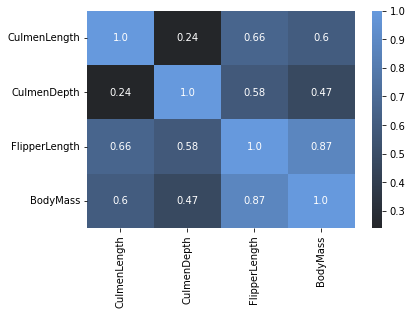

In [15]:
sns.heatmap(data.corr().abs().round(2), annot=True, fmt="0", cmap=palette)

### Train / Validation / Test Datasets

In [16]:
x_train, x_tmp, y_train, y_tmp = sk.model_selection.train_test_split(data, labels, test_size = 0.30, random_state=seed)
x_valid, x_test, y_valid, y_test = sk.model_selection.train_test_split(x_tmp, y_tmp, test_size = 0.30, random_state=seed)
print(f"train/validation: {len(x_train)}/{len(x_valid)}")

train/validation: 239/72


### Models
#### Logistic Regression

In [17]:
model = LogisticRegression(max_iter=1000, random_state=seed)
model.fit(x_train, y_train)
y_pred = model.predict(x_valid)
print(sk.metrics.classification_report(y_pred, y_valid))
accuracy = sk.metrics.accuracy_score(y_valid, y_pred)
print(f"Accuracy: {accuracy}")

                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       1.00      1.00      1.00        31
Chinstrap penguin (Pygoscelis antarctica)       1.00      1.00      1.00        16
        Gentoo penguin (Pygoscelis papua)       1.00      1.00      1.00        25

                                 accuracy                           1.00        72
                                macro avg       1.00      1.00      1.00        72
                             weighted avg       1.00      1.00      1.00        72

Accuracy: 1.0


#### kNN

In [18]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(x_train, y_train)
y_pred = model.predict(x_valid)
print(sk.metrics.classification_report(y_pred, y_valid))
accuracy = sk.metrics.accuracy_score(y_valid, y_pred)
print(f"Accuracy: {accuracy}")

                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       0.81      0.68      0.74        37
Chinstrap penguin (Pygoscelis antarctica)       0.31      0.42      0.36        12
        Gentoo penguin (Pygoscelis papua)       0.88      0.96      0.92        23

                                 accuracy                           0.72        72
                                macro avg       0.67      0.68      0.67        72
                             weighted avg       0.75      0.72      0.73        72

Accuracy: 0.7222222222222222


#### Decision Tree

In [19]:
model = DecisionTreeClassifier(
    criterion='entropy', random_state=147,
    max_depth=5, min_samples_leaf=4,
)
model.fit(x_train, y_train)
y_pred = model.predict(x_valid)
print(sk.metrics.classification_report(y_pred, y_valid))
accuracy = sk.metrics.accuracy_score(y_valid, y_pred)
print(f"Accuracy: {accuracy}")

                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       1.00      0.94      0.97        33
Chinstrap penguin (Pygoscelis antarctica)       0.88      1.00      0.93        14
        Gentoo penguin (Pygoscelis papua)       1.00      1.00      1.00        25

                                 accuracy                           0.97        72
                                macro avg       0.96      0.98      0.97        72
                             weighted avg       0.98      0.97      0.97        72

Accuracy: 0.9722222222222222


#### SVC

In [20]:
model = SVC(C=0.9)
model.fit(x_train, y_train)
y_pred = model.predict(x_valid)
print(sk.metrics.classification_report(y_pred, y_valid))
accuracy = sk.metrics.accuracy_score(y_valid, y_pred)
print(f"Accuracy: {accuracy}")

                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       0.87      0.60      0.71        45
Chinstrap penguin (Pygoscelis antarctica)       0.00      0.00      0.00         0
        Gentoo penguin (Pygoscelis papua)       0.92      0.85      0.88        27

                                 accuracy                           0.69        72
                                macro avg       0.60      0.48      0.53        72
                             weighted avg       0.89      0.69      0.78        72

Accuracy: 0.6944444444444444


C:\Users\apigl\.virtualenvs\bdsm-Grc_FbtC\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\apigl\.virtualenvs\bdsm-Grc_FbtC\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\apigl\.virtualenvs\bdsm-Grc_FbtC\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Random Forest

In [21]:
model = RandomForestClassifier(
    n_estimators=100,
    max_leaf_nodes=16,
    n_jobs=-1
)
model.fit(x_train, y_train)
y_pred = model.predict(x_valid)
print(sk.metrics.classification_report(y_pred, y_valid))
accuracy = sk.metrics.accuracy_score(y_valid, y_pred)
print(f"Accuracy: {accuracy}")

                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       1.00      1.00      1.00        31
Chinstrap penguin (Pygoscelis antarctica)       1.00      1.00      1.00        16
        Gentoo penguin (Pygoscelis papua)       1.00      1.00      1.00        25

                                 accuracy                           1.00        72
                                macro avg       1.00      1.00      1.00        72
                             weighted avg       1.00      1.00      1.00        72

Accuracy: 1.0
